# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [40]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&format=json&apiKey={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.5
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapuskasing


Processing Record 2 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 3 of Set 1 | saint-pierre
Processing Record 4 of Set 1 | waterboro
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | sambava
Processing Record 7 of Set 1 | jianshui
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | brookings
Processing Record 11 of Set 1 | sungai penuh
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | kashgar
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | zeya
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | boyabat
Processing Record 20 of Set 1 | flying fish cove
Processing Record 21 of Set 1 | las varillas
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of Set 1 | tezu
Processing Record 24 of Set 1 | grytvi

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()


City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,-17.58,92,100,3.65,CA,1705755888
1,saint-pierre,-21.3393,55.4781,29.47,74,75,6.69,RE,1705755680
2,waterboro,43.5356,-70.7151,-11.78,69,75,3.58,US,1705755889
3,tiksi,71.6872,128.8694,-32.32,95,99,4.83,RU,1705755890
4,sambava,-14.2667,50.1667,27.90,83,100,3.01,MG,1705755890


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,-17.58,92,100,3.65,CA,1705755888
1,saint-pierre,-21.3393,55.4781,29.47,74,75,6.69,RE,1705755680
2,waterboro,43.5356,-70.7151,-11.78,69,75,3.58,US,1705755889
3,tiksi,71.6872,128.8694,-32.32,95,99,4.83,RU,1705755890
4,sambava,-14.2667,50.1667,27.90,83,100,3.01,MG,1705755890


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

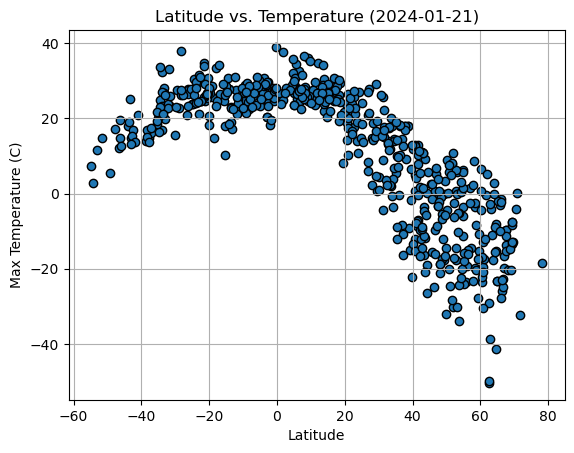

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f'Latitude vs. Temperature {time.strftime("(%Y-%m-%d)")}')
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

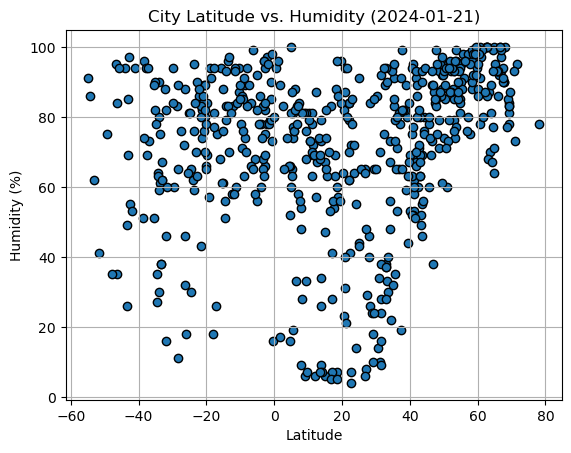

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("(%Y-%m-%d)")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

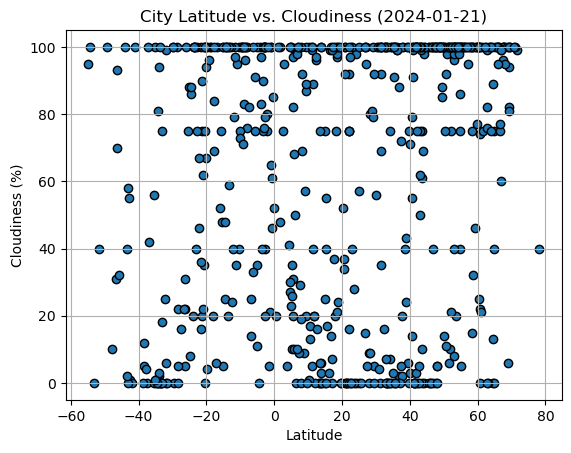

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("(%Y-%m-%d)")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

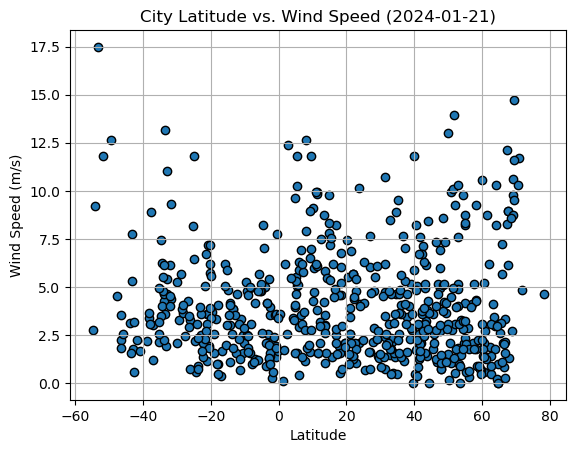

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("(%Y-%m-%d)")}')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [115]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,-17.58,92,100,3.65,CA,1705755888
2,waterboro,43.5356,-70.7151,-11.78,69,75,3.58,US,1705755889
3,tiksi,71.6872,128.8694,-32.32,95,99,4.83,RU,1705755890
5,jianshui,23.6363,102.8264,14.02,64,28,2.07,CN,1705755891
6,yellowknife,62.4560,-114.3525,-29.18,100,100,1.86,CA,1705755716


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint-pierre,-21.3393,55.4781,29.47,74,75,6.69,RE,1705755680
4,sambava,-14.2667,50.1667,27.90,83,100,3.01,MG,1705755890
9,sungai penuh,-2.0833,101.3833,18.38,97,80,0.28,ID,1705755893
11,puerto natales,-51.7236,-72.4875,14.90,41,40,11.83,CL,1705755814
13,adamstown,-25.0660,-130.1015,23.74,81,88,6.46,PN,1705755738


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.718469322369836


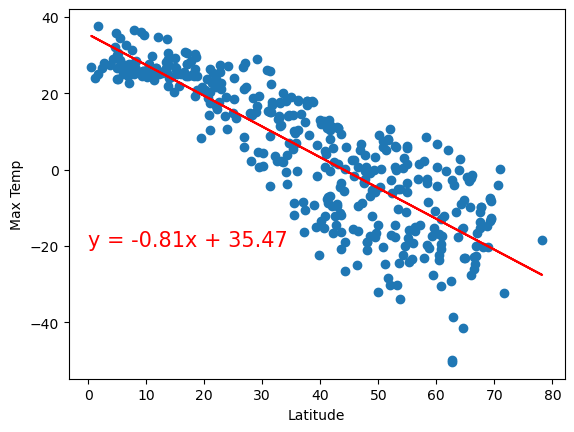

In [118]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.2894677862056312


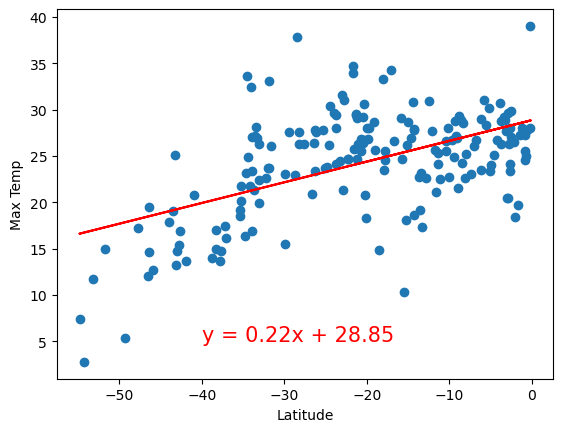

In [70]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: Temperature Vs. Latitude Linear Regression Plot** 

*Northern Hemisphere* - 
There is a moderately strong negative linear relationship between temperature and latitude (r2 = 0.718), indicating that as latitude increases, temperature tends to decrease. 

*Southern Hemisphere* -
A moderate positive linear relationship exists between temperature and latitude in the Southern Hemisphere (r2 = 0.289), suggesting that as latitude increases, temperature tends to rise.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.22260373770817724


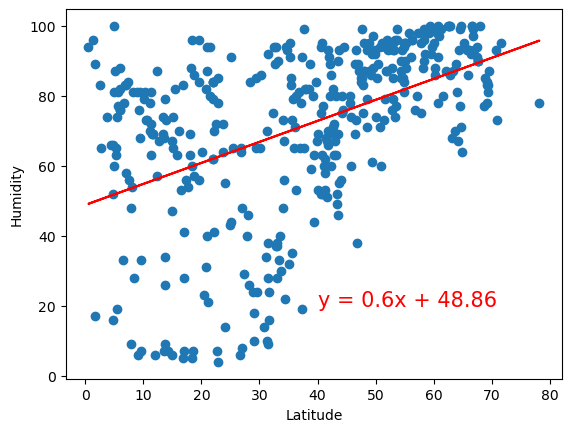

In [119]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04758835995994603


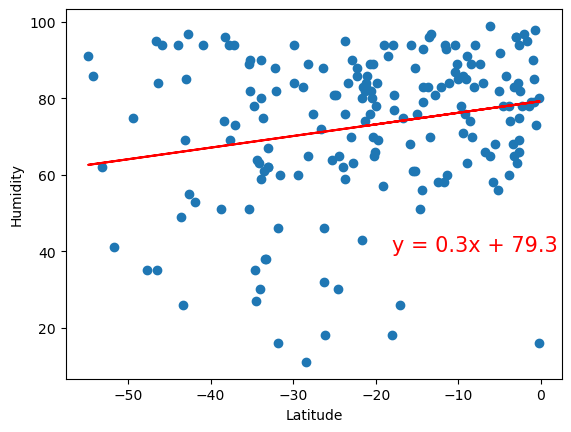

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: Humidity Vs. Latitude Linear Regression Plot** 

*Northern Hemisphere* - 
A moderate positive linear relationship exists between humidity and latitude (r2=0.223) in the Northern Hemisphere. As latitude increases, humidity tends to rise. 

*Southern Hemisphere* - 
There is a weak positive linear relationship between humidity and latitude (r2 =0.048) in the Southern Hemisphere. As latitude increases, humidity shows a slight tendency to increase

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07661675425570089


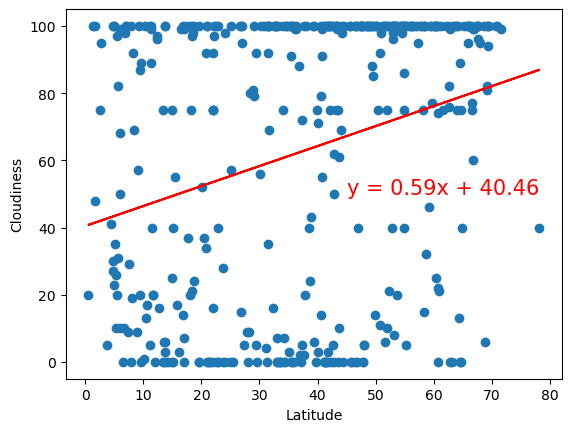

In [120]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.11770497224381668


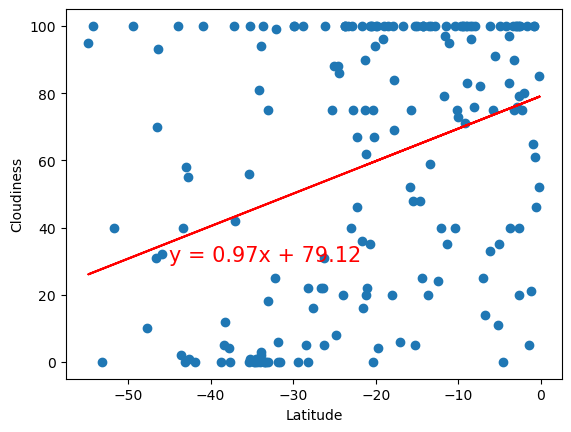

In [121]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Cloudiness Vs. Latitude Linear Regression Plot** 

*Northern Hemisphere* - 
A weak positive linear relationship is observed between cloudiness and latitude (r2=0.077) in the Northern Hemisphere. As latitude increases, there is a slight tendency for cloudiness to rise.

*Southern Hemisphere* - 
There is a moderate positive linear relationship between cloudiness and latitude (r2=0.118) in the Southern Hemisphere. As latitude increases, cloudiness shows a tendency to increase more noticeably

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001985552945901608


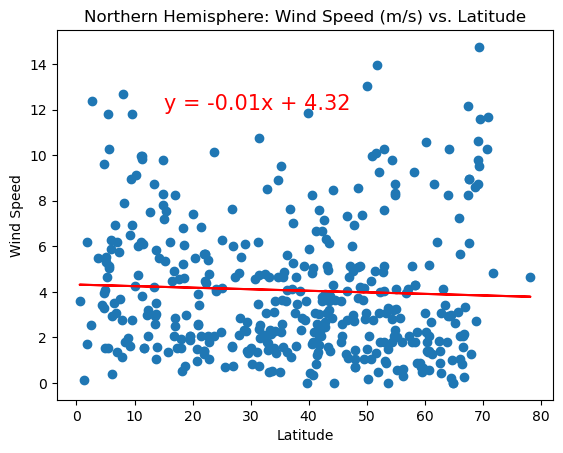

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere: Wind Speed (m/s) vs. Latitude")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.09517207948858554


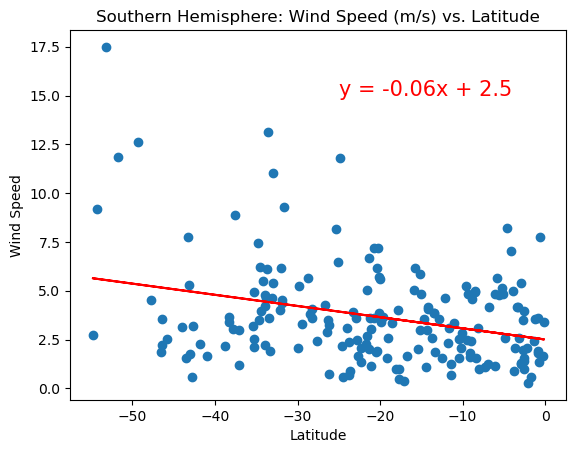

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere: Wind Speed (m/s) vs. Latitude")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Wind Speed Vs. Latitude Linear Regression Plot** 

*Northern Hemisphere* - 
There is an extremely weak negative linear relationship between wind speed and latitude (r2 = 0.00199) in the Northern Hemisphere. The linear regression equation suggests a minimal decrease in wind speed as latitude increases

*Southern Hemisphere* - 
A weak negative linear relationship is observed between wind speed and latitude (r2 = 0.0952) in the Southern Hemisphere. As latitude increases, there is a slight tendency for wind speed to decrease. 